Import dependencies yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc

Analisis Data Collection

Source: PIMA Diabetes Dataset https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
# load data ke pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

# tes print 5 kolom dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# jumlah baris dan kolom pada dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# ukuran statistik dari dataset
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

label dataset

0 -> non-diabetes

1 -> diabetes

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Isi Missing Value

In [ ]:
diabetes_dataset['Glucose'].replace(to_replace=0, value=diabetes_dataset['Glucose'].mean(), inplace=True)
diabetes_dataset['BloodPressure'].replace(to_replace=0, value=diabetes_dataset['BloodPressure'].mean(), inplace=True)
diabetes_dataset['BMI'].replace(to_replace=0, value=diabetes_dataset['BMI'].mean(), inplace=True)

In [ ]:
# memisahkan kolom label (Outcome) dengan kolom lain
x = diabetes_dataset.drop(columns = ['SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Outcome'], axis=1)
y = diabetes_dataset['Outcome']

In [ ]:
print(x)

     Pregnancies  Glucose  BloodPressure   BMI  Age
0              6    148.0           72.0  33.6   50
1              1     85.0           66.0  26.6   31
2              8    183.0           64.0  23.3   32
3              1     89.0           66.0  28.1   21
4              0    137.0           40.0  43.1   33
..           ...      ...            ...   ...  ...
763           10    101.0           76.0  32.9   63
764            2    122.0           70.0  36.8   27
765            5    121.0           72.0  26.2   30
766            1    126.0           60.0  30.1   47
767            1     93.0           70.0  30.4   23

[768 rows x 5 columns]


In [ ]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Balancing Class

In [ ]:
over = RandomOverSampler()
x, y = over.fit_resample(x, y)

1    500
0    500
Name: Outcome, dtype: int64


Text(0.5, 1.0, 'After Balancing The Class')

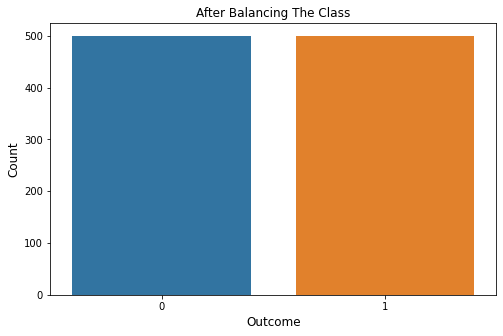

In [ ]:
print(y.value_counts())
plt.figure(figsize = (8,5))
sns.countplot(x = y)
plt.xlabel('Outcome', size = 12)
plt.ylabel('Count', size = 12)
plt.title('After Balancing The Class', size = 12)

Memisahkan dataset untuk training model dan testing model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(1000, 5) (750, 5) (250, 5)


Training Model

In [ ]:
l = []
best_acu = 0
best_pred = 0
for i in range (10, 110):
    rcla = RandomForestClassifier(n_estimators = i)
    rcla.fit(x_train.values, y_train.values)
    predicted = rcla.predict(x_test.values)
    acu = accuracy_score(predicted.round(), y_test.values)
    l.append(acu)
    if best_acu < acu:
        best_acu = acu
        best_pred = predicted

Tes Akurasi

Accuracy using Random Forest is 88.4 %


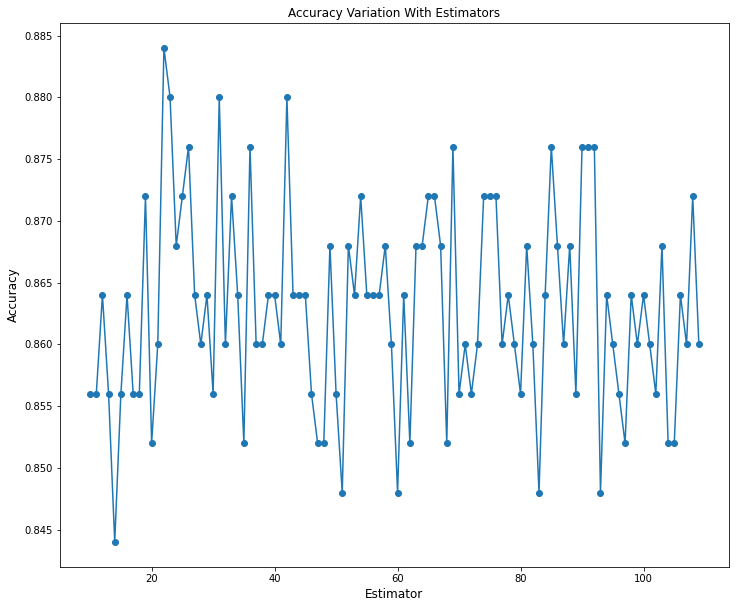

In [ ]:
plt.figure(figsize = (12,10))
plt.plot(range (10, 110), l, marker = 'o')
plt.xlabel('Estimator', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy Variation With Estimators', size = 12)
print("Accuracy using Random Forest is {} %".format(best_acu*100))

AUC value is 89.30817610062893 %


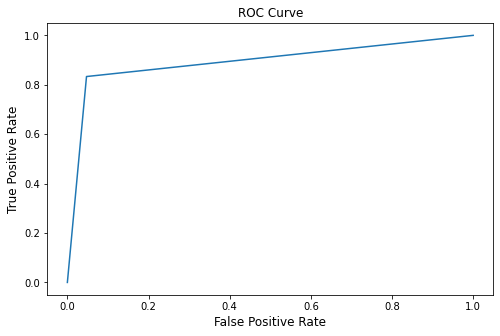

In [ ]:
fpr, tpr, threshould = roc_curve(best_pred, y_test)
plt.figure(figsize = (8,5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('ROC Curve', size = 12)
print("AUC value is {} %".format(auc(fpr, tpr)))

**Membuat Sistem Prediksi**

In [ ]:
input_data = (0, 100, 90, 28, 32)

# mengubah input menjadi numpy array
input_data_as_numpy_array = np.asarray(input_data)

# mengubah bentuk array karena hanya prediksi satu
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = rcla.predict(input_data_reshaped)

if (prediction[0] == 0):
  print('Tidak terindikasi diabetes')
else:
  print('Terindikasi diabetes')

Tidak terindikasi diabetes


Save Trained Model

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(rcla, open(filename, 'wb'))

In [ ]:
# load saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
input_data = (0, 100, 90, 28, 32)

# mengubah input menjadi numpy array
input_data_as_numpy_array = np.asarray(input_data)

# mengubah bentuk array karena hanya prediksi satu
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshaped)

if (prediction[0] == 0):
  print('Tidak terindikasi diabetes')
else:
  print('Terindikasi diabetes')

Tidak terindikasi diabetes
